In [1]:
import os
import datetime
import matplotlib.pyplot as plt
from davitpy import utils
from imagers.ssusi import ssusi_utils
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
inpDir = "/home/bharat/Documents/code/ssusi_data/prcsd/" # Make sure you have this dir or create it
fileDate = datetime.datetime( 2011, 5, 16 )
inpTime = datetime.datetime( 2011, 5, 16, 9, 0 )
coords="mlt"
satList = ["F18" ]#, "F17", "F18"]
figName = "../plots/ssusi-" + inpTime.strftime("%Y%m%d") + ".pdf" 

reading data from---> /home/bharat/Documents/code/ssusi_data/prcsd/F18/20110516.txt
reading data from---> /home/bharat/Documents/code/ssusi_data/prcsd/F17/20110516.txt
reading data from---> /home/bharat/Documents/code/ssusi_data/prcsd/F16/20110516.txt


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


converting from geo to aacgm coordinates


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


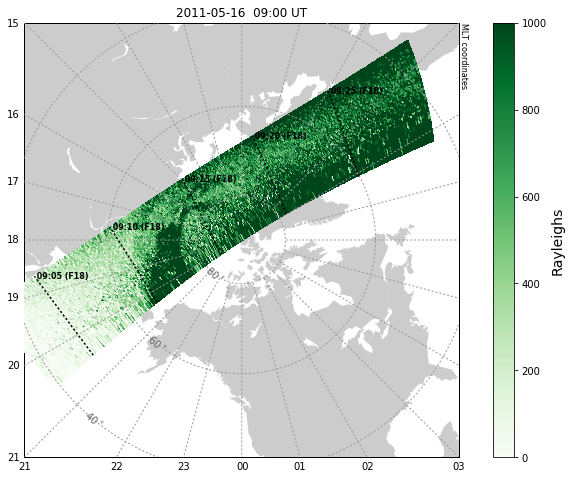

In [3]:
ssObj = ssusi_utils.UtilsSsusi( inpDir, fileDate )
# PLOT DATA
fDict = ssObj.filter_data_by_time(inpTime, timeDelta=40.)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords, lat_0=90., lon_0=0, datetime=inpTime)
ssObj.overlay_sat_data( fDict, m, ax, satList=satList,\
         inpTime=inpTime, vmin=0., vmax=1000., autoScale=False, coords=coords,alpha=1. )

fig.savefig(figName,bbox_inches='tight')